In [1]:
import zipfile
import os
import numpy as np 
from keras.layers import Dense,Flatten,Input
from keras.models import Model 
from keras.applications import ResNet50,VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from glob import glob
import matplotlib.pyplot as plt


In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"karthicktj","key":"d9816e97a435a5ca4dbaf652bc500351"}'}

In [3]:
!mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d slothkong/10-monkey-species

100% 545M/547M [00:08<00:00, 83.0MB/s]
100% 547M/547M [00:08<00:00, 68.8MB/s]


In [4]:
basefile = "/content/10-monkey-species.zip"
monkey = zipfile.ZipFile(basefile ,"r")
monkey.extractall("monkey")
monkey.close()



In [5]:
train_data = "/content/monkey/training/training"
test_data =  "/content/monkey/validation/validation"


In [6]:
from glob import glob
train_folder = glob("/content/monkey/training/training/*")
print(train_folder)

['/content/monkey/training/training/n8', '/content/monkey/training/training/n1', '/content/monkey/training/training/n3', '/content/monkey/training/training/n5', '/content/monkey/training/training/n2', '/content/monkey/training/training/n7', '/content/monkey/training/training/n4', '/content/monkey/training/training/n0', '/content/monkey/training/training/n6', '/content/monkey/training/training/n9']


In [7]:
#list the directory
print(os.listdir("/content/monkey/training/training"))

['n8', 'n1', 'n3', 'n5', 'n2', 'n7', 'n4', 'n0', 'n6', 'n9']


In [8]:
from keras.layers import Dropout ,Conv2D,MaxPooling2D
from keras.models import Sequential
model = Sequential([Conv2D(16 , (3,3),activation = "relu" ,input_shape = (150,150,3)),
                    MaxPooling2D(2,2),
                    Conv2D(32 ,(3,3), activation = "relu" ,padding = "same"),
                    MaxPooling2D(2,2),
                    Conv2D(64 ,(3,3),activation = "relu" ,padding = "same"),
                    MaxPooling2D(2,2),
                    Conv2D(128 ,(3,3),activation = "relu" ,padding = "same" ),
                    MaxPooling2D(2,2),
                    Conv2D(256 ,(3,3),activation = "relu" ,padding = "same" ),
                    MaxPooling2D(2,2),
                    Dropout(0.5),
                    Flatten(),
                    Dense(1024 , activation = "relu"),
                    Dense(512 ,activation="relu"),
                    Dense(256 , activation = "relu"),
                    Dense(128 , activation = "relu"),
                    Dropout(0.3),
                    Dense(len(train_folder),activation = "softmax")
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 74, 74, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 128)       7

In [10]:
#compiling my model
adam = Adam(learning_rate = 0.001)
model.compile(optimizer="adam" ,metrics = ["accuracy"] ,loss = "categorical_crossentropy")

In [11]:
train_gen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')




train_d = train_gen.flow_from_directory(train_data ,  batch_size = 64 , class_mode = "categorical" ,target_size = (150,150))


Found 1098 images belonging to 10 classes.


In [12]:
print(os.listdir(test_data))

['n8', 'n1', 'n3', 'n5', 'n2', 'n7', 'n4', 'n0', 'n6', 'n9']


In [13]:
validate_gen = ImageDataGenerator(rescale= 1./255) # rescaling image
test_d = validate_gen.flow_from_directory(test_data ,  batch_size = 64 , class_mode = "categorical" ,target_size = (150,150))

Found 272 images belonging to 10 classes.


In [14]:
#bulid a model
history  = model.fit_generator(train_d,epochs = 150 ,validation_data = test_d , steps_per_epoch = len(train_d) , validation_steps=len(test_d))

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/150
18/18 [==============================] - 32s 2s/step - loss: 2.3100 - accuracy: 0.0747 - val_loss: 2.3023 - val_accuracy: 0.0993
Epoch 2/150
18/18 [==============================] - 32s 2s/step - loss: 2.2999 - accuracy: 0.1157 - val_loss: 2.3050 - val_accuracy: 0.0956
Epoch 3/150
18/18 [==============================] - 33s 2s/step - loss: 2.3038 - accuracy: 0.0956 - val_loss: 2.2994 - val_accuracy: 0.1029
Epoch 4/150
18/18 [==============================] - 32s 2s/step - loss: 2.2945 - accuracy: 0.0993 - val_loss: 2.2784 - val_accuracy: 0.1618
Epoch 5/150
18/18 [==============================] - 33s 2s/step - loss: 2.2744 - accuracy: 0.1485 - val_loss: 2.2471 - val_accuracy: 0.1838
Epoch 6/150
18/18 [==============================] - 32s 2s/step - loss: 2.2098 - accuracy: 0.1639 - val_loss: 2.1598 - val_accuracy: 0.1985
Epoch 7/150
18/18 [==============================] - 33s 2s/step - loss: 2.108

In [19]:
model.save("monkey.h5")

In [16]:
history.history

{'accuracy': [0.07468123733997345,
  0.11566484719514847,
  0.09562841802835464,
  0.09927140176296234,
  0.14845173060894012,
  0.16393442451953888,
  0.21038250625133514,
  0.2012750506401062,
  0.16484516859054565,
  0.1803278625011444,
  0.20309653878211975,
  0.22859744727611542,
  0.22313296794891357,
  0.2595628499984741,
  0.2741347849369049,
  0.2959927022457123,
  0.32422587275505066,
  0.31056466698646545,
  0.346994549036026,
  0.3606557250022888,
  0.3897996246814728,
  0.4098360538482666,
  0.4162113070487976,
  0.3925318717956543,
  0.408925324678421,
  0.44262295961380005,
  0.44626593589782715,
  0.4453551769256592,
  0.45264115929603577,
  0.4781420826911926,
  0.471766859292984,
  0.5182149410247803,
  0.5145719647407532,
  0.5127504467964172,
  0.5191256999969482,
  0.5409836173057556,
  0.5664845108985901,
  0.5664845108985901,
  0.5573770403862,
  0.5591985583305359,
  0.5646630525588989,
  0.6284152865409851,
  0.6284152865409851,
  0.6138433218002319,
  0.605646

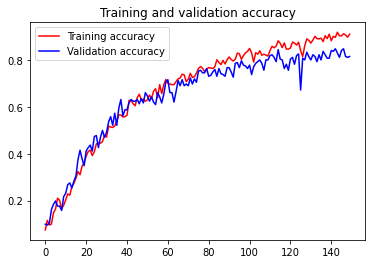

<Figure size 432x288 with 0 Axes>

In [17]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

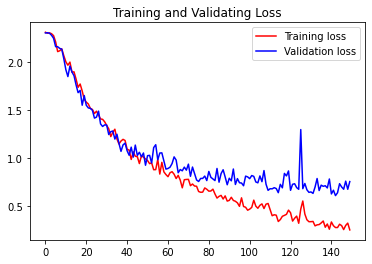

<Figure size 432x288 with 0 Axes>

In [18]:

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validating Loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [20]:
ypred = model.predict(test_d)
ypred

array([[1.6303235e-06, 2.4264039e-01, 5.8946881e-04, ..., 4.8927742e-04,
        5.3478283e-04, 2.4674691e-03],
       [2.6640456e-22, 1.3221108e-06, 1.6507086e-14, ..., 4.7897146e-13,
        1.4204793e-12, 9.0158955e-21],
       [4.8184854e-31, 3.5789701e-13, 1.0000000e+00, ..., 6.5997316e-20,
        3.7165164e-21, 7.3200162e-29],
       ...,
       [6.2201257e-06, 9.5130277e-01, 1.2486162e-02, ..., 1.5004686e-02,
        1.1639880e-03, 6.3964020e-04],
       [1.7275049e-04, 2.0131418e-03, 8.3385916e-05, ..., 4.4123819e-03,
        9.8960847e-01, 8.1591519e-05],
       [9.0042412e-01, 5.2068879e-07, 4.1677706e-07, ..., 7.5360127e-05,
        2.1571435e-04, 9.5984936e-02]], dtype=float32)

In [22]:

from google.colab import files
from keras.preprocessing import image

upload=files.upload()
for fn in upload.keys():

  # predicting images
  path=fn
  img=image.load_img(path, target_size=(150, 150))
    
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
    
  classes = model.predict(images, batch_size=10)
  pred = np.argmax(classes ,axis = 1)
  if pred == 0:
    print(fn + "is a mantled howler")
  elif pred == 1:
    print(fn  + "is patas_monkey")
  elif pred == 2:
    print(fn +"Bald_uakari")
  elif pred == 3: 
    print(fn +"Japanese_Macaque")
  elif pred == 4:
    print(fn + 'pygmy_marmoset')
  elif pred == 5:
    print(fn + 'white_headed_night_monkey')
  elif pred == 6:
    print(fn + 'silvery_moarmoset')
  elif pred == 7:
    print(fn + "Common_Squirrel_monkey")
  elif pred == 8:
    print(fn + "Black_headed_night_monkey")
  else:
    print(fn + "Nigiri_langur") 
 

Saving Bald Uakari1.jpg to Bald Uakari1 (1).jpg
Saving Bald Uakari2.jpg to Bald Uakari2 (1).jpg
Saving Bald Uakari3.jpg to Bald Uakari3 (1).jpg
Saving Mantaled_howler1.jpg to Mantaled_howler1 (1).jpg
Saving Mantaled_howler2.jpg to Mantaled_howler2 (1).jpg
Saving Mantaled_howler3.jpg to Mantaled_howler3 (1).jpg
Saving Pattas1.jpg to Pattas1 (1).jpg
Saving pattas2.jpg to pattas2 (1).jpg
Saving pattas3.jpg to pattas3 (1).jpg
Bald Uakari1.jpgBald_uakari
Bald Uakari2.jpgBald_uakari
Bald Uakari3.jpgBald_uakari
Mantaled_howler1.jpgis a mantled howler
Mantaled_howler2.jpgis a mantled howler
Mantaled_howler3.jpgis a mantled howler
Pattas1.jpgis a mantled howler
pattas2.jpgCommon_Squirrel_monkey
pattas3.jpgCommon_Squirrel_monkey


In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)